In [1]:
# Load the dataset from OpenML
import openml

dataset = openml.datasets.get_dataset(1461)  # Dataset ID
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown


In [2]:
# Rename Features

features_name = {'V1':'Age','V2':'Job','V3':'Marital_status','V4':'Education','V5':'Default','V6':'Balance',
                 'V7':'House_loan','V8':'Pers_loan','V9':'Contact','V10':'Last_contact_day','V11':'Last_contact_month',
                 'V12':'Contact_duration',
                 'V13':'Campaign','V14':'Passed_days','V15':'Previous_days','V16':'Prev_out_come'}

In [3]:
X.rename(columns=features_name,inplace=True)

In [4]:
X.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown


In [5]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# convert and merge all the features with output feature

dy = pd.DataFrame(y)
dy.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [7]:
df = pd.concat([X,dy],axis=1)
df.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Class
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [8]:
# rename output feature
df.rename(columns={'Class':'Subscribed'},inplace=True)
df.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 45211 non-null  uint8   
 1   Job                 45211 non-null  category
 2   Marital_status      45211 non-null  category
 3   Education           45211 non-null  category
 4   Default             45211 non-null  category
 5   Balance             45211 non-null  float64 
 6   House_loan          45211 non-null  category
 7   Pers_loan           45211 non-null  category
 8   Contact             45211 non-null  category
 9   Last_contact_day    45211 non-null  uint8   
 10  Last_contact_month  45211 non-null  category
 11  Contact_duration    45211 non-null  float64 
 12  Campaign            45211 non-null  uint8   
 13  Passed_days         45211 non-null  float64 
 14  Previous_days       45211 non-null  float64 
 15  Prev_out_come       45211 non-null  

In [10]:
# Check duplicate data

df[df.duplicated()]

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed


In [11]:
# check missing values

df.isnull().sum()

Age                   0
Job                   0
Marital_status        0
Education             0
Default               0
Balance               0
House_loan            0
Pers_loan             0
Contact               0
Last_contact_day      0
Last_contact_month    0
Contact_duration      0
Campaign              0
Passed_days           0
Previous_days         0
Prev_out_come         0
Subscribed            0
dtype: int64

In [12]:
df.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [13]:
for i in df.columns:
    print("Unique values of ",i," : ",df[i].unique())
    print("Number of unique values of ",i, " : ",df[i].nunique())
    print("#----------------------------------------------------------------------------------------------#")

Unique values of  Age  :  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Number of unique values of  Age  :  77
#----------------------------------------------------------------------------------------------#
Unique values of  Job  :  ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.' < 'blue-collar' < 'entrepreneur' < 'housemaid' ... 'student' < 'technician' < 'unemployed' < 'unknown']
Number of unique values of  Job  :  12
#----------------------------------------------------------------------------------------------#
Unique values of  Marital_status  :  ['married', 'single', 'divorced']
Categories (3, object): ['divorced' < 'married' < 'single']
Number of unique

In [14]:
# Subcribed feature has values 1,2
# Replacing 2 with 0

df['Subscribed'] = df['Subscribed'].replace({'2':'0'})

C:\Users\a\AppData\Local\Temp\ipykernel_12788\3821033866.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Subscribed'] = df['Subscribed'].replace({'2':'0'})


In [15]:
df['Subscribed'] = df['Subscribed'].astype(int)

In [16]:
df.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [17]:
features_bar = ['Job', 'Marital_status', 'Education', 'Default', 'House_loan', 'Pers_loan', 'Contact', 'Last_contact_month', 'Prev_out_come']

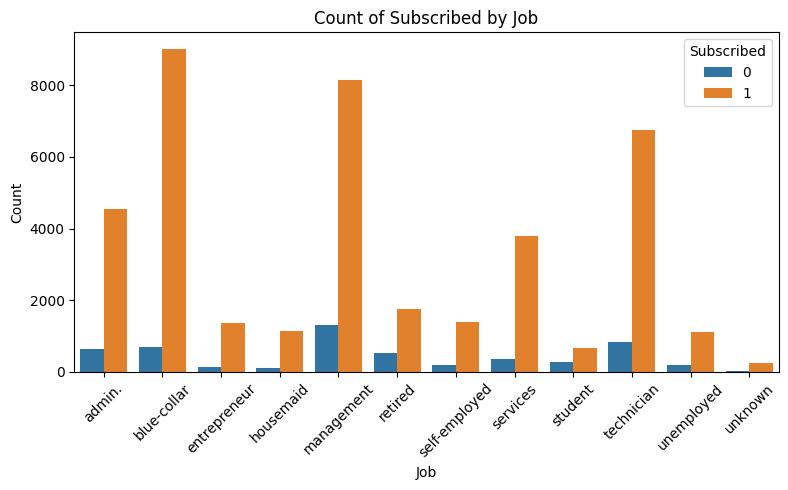

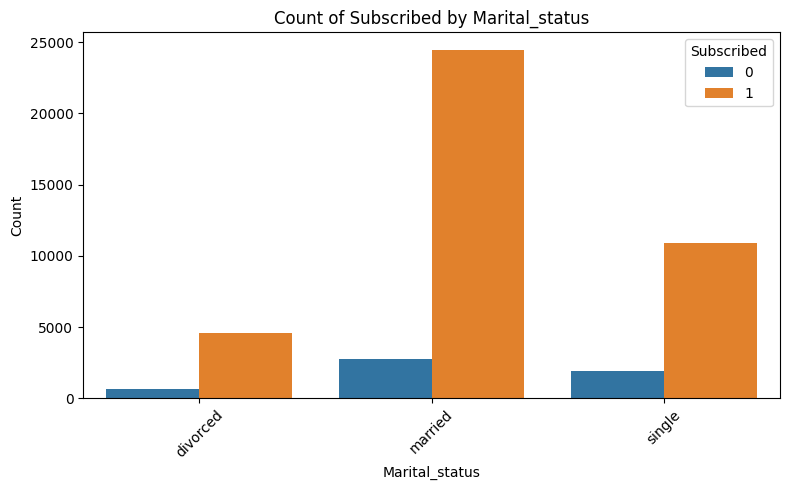

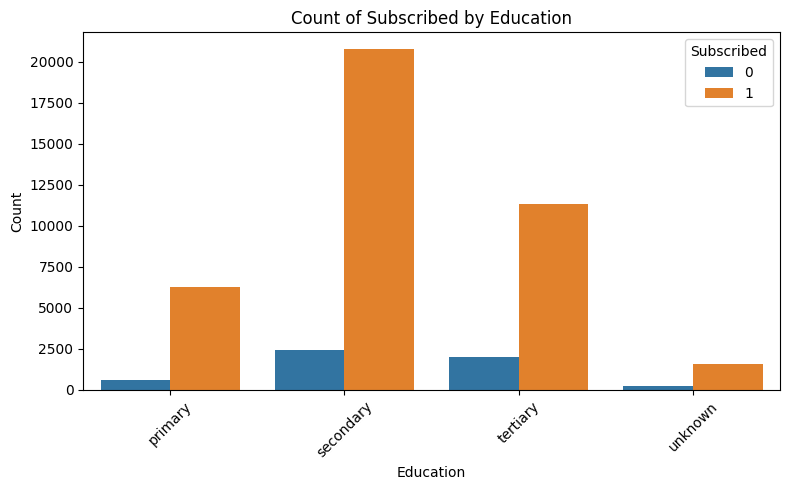

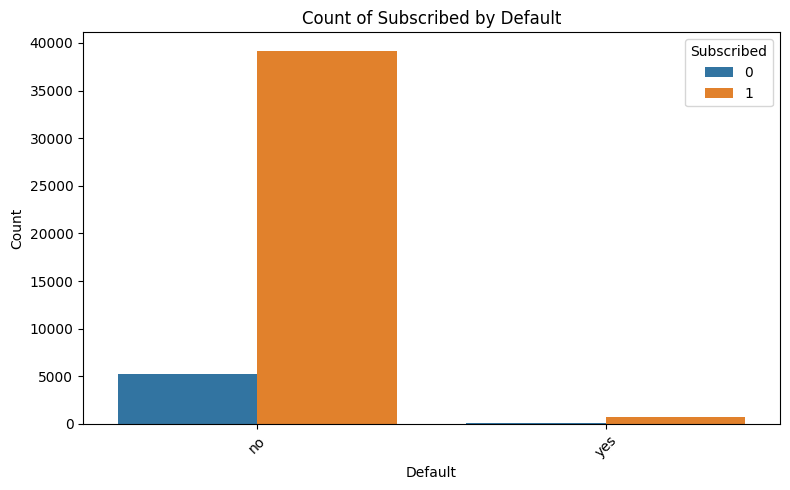

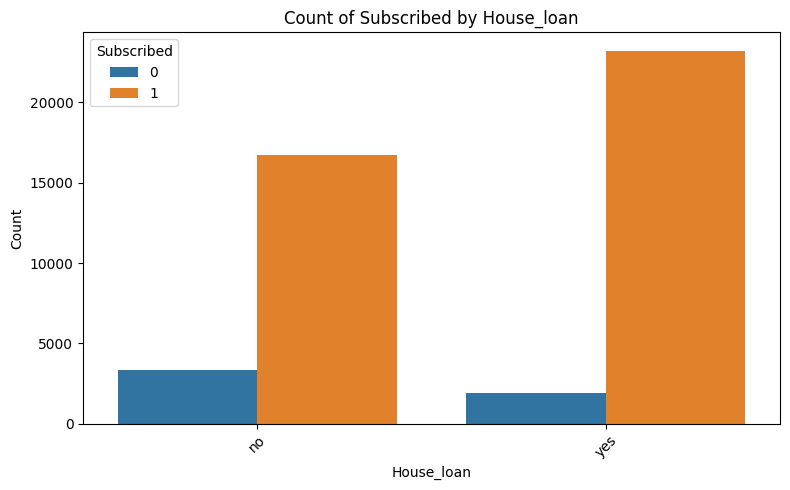

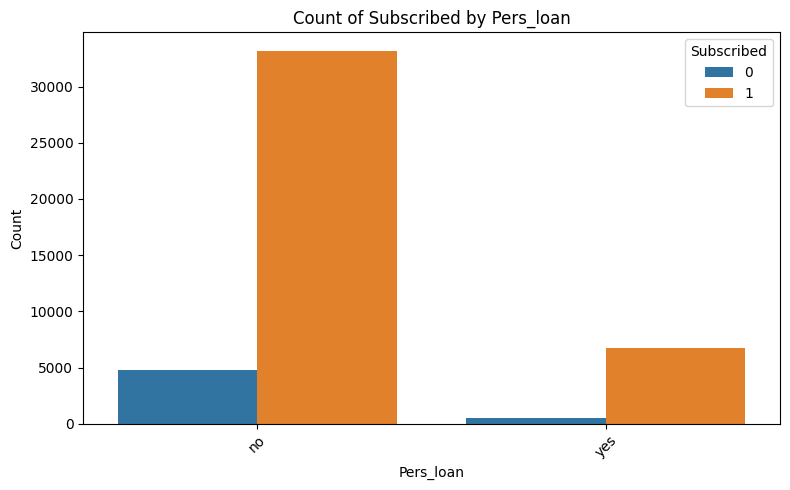

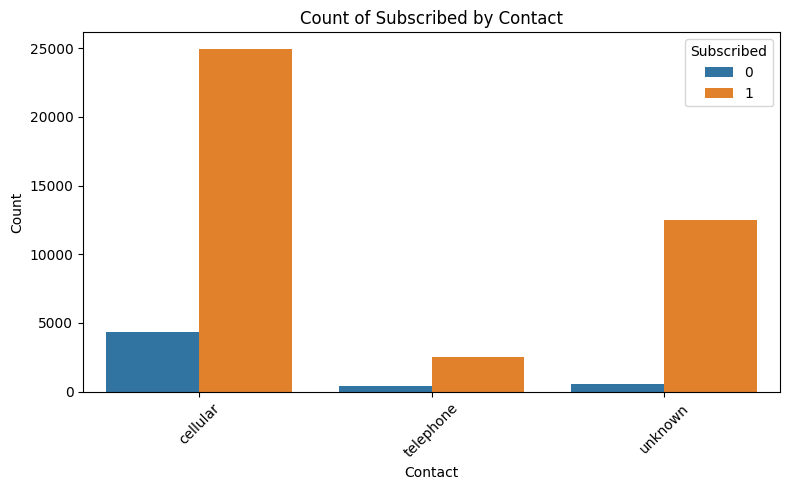

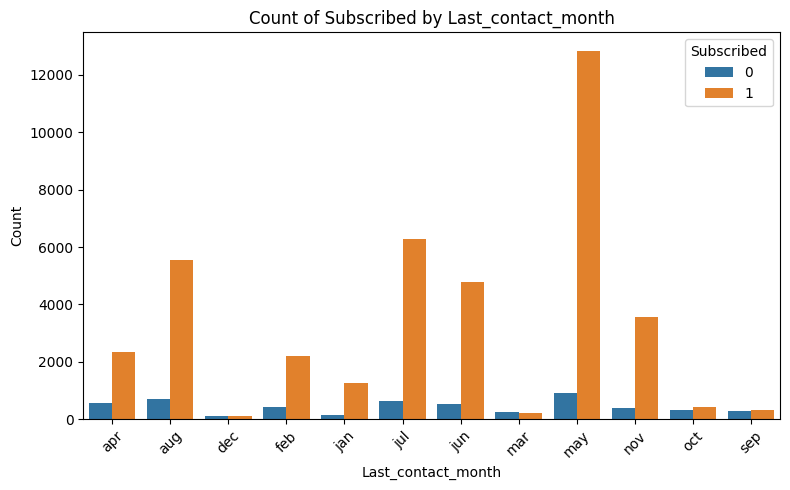

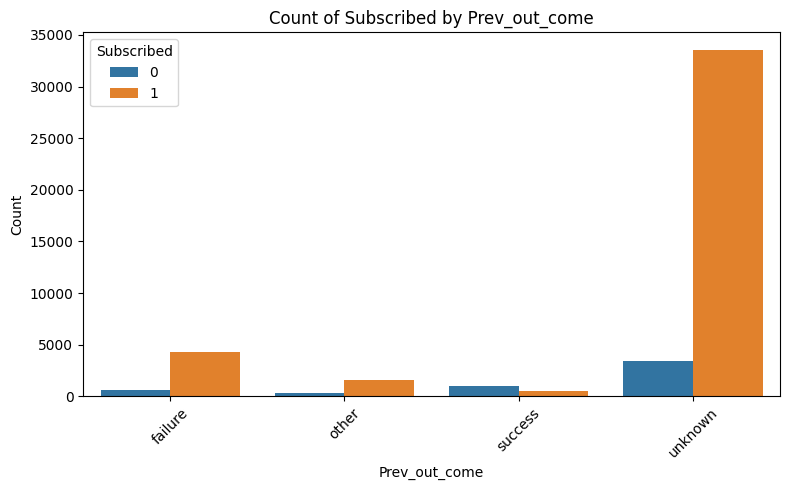

In [18]:
for feature in features_bar:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='Subscribed')
    plt.title(f'Count of Subscribed by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Subscribed')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Conclusion

1. People with blue collar jobs, working in Management and as a Technician have subscribed way more as compared to others
2. Married people have subscribed more
3. Secondary educated people have subscribed more
4. People who have been contacted by cellular device have subscribed more

In [19]:
# Separating categorical and numeric features based on the data types

categorical_features = df.select_dtypes(include=['category']).columns.tolist()
numeric_features = df.select_dtypes(include=['float64', 'uint8','int32','int64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

Categorical Features: ['Job', 'Marital_status', 'Education', 'Default', 'House_loan', 'Pers_loan', 'Contact', 'Last_contact_month', 'Prev_out_come']
Numeric Features: ['Age', 'Balance', 'Last_contact_day', 'Contact_duration', 'Campaign', 'Passed_days', 'Previous_days', 'Subscribed']


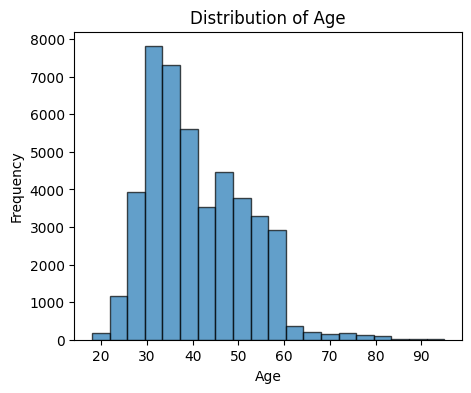

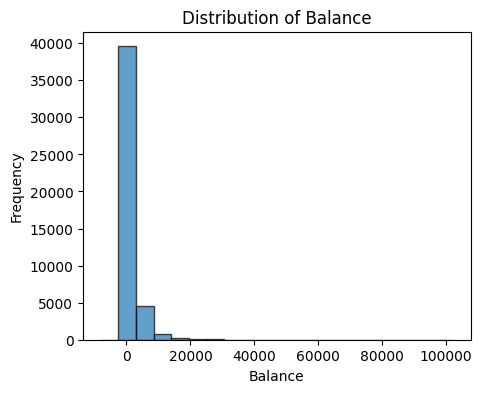

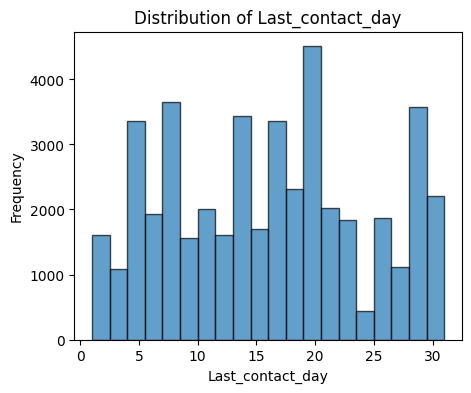

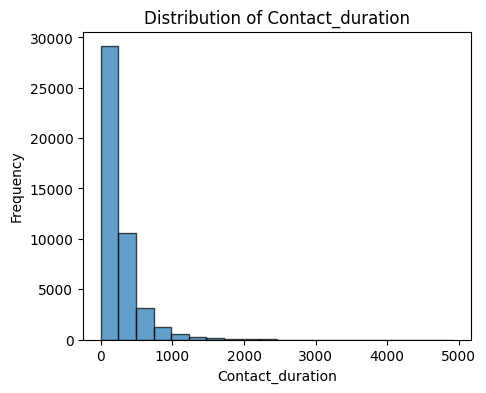

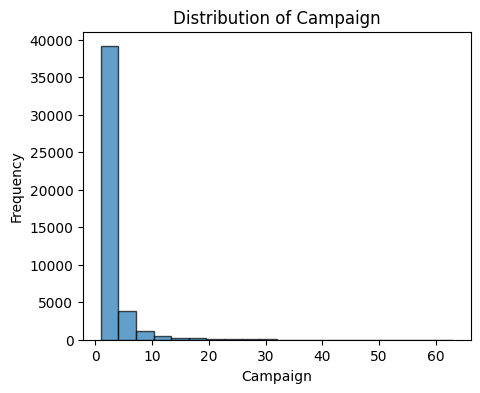

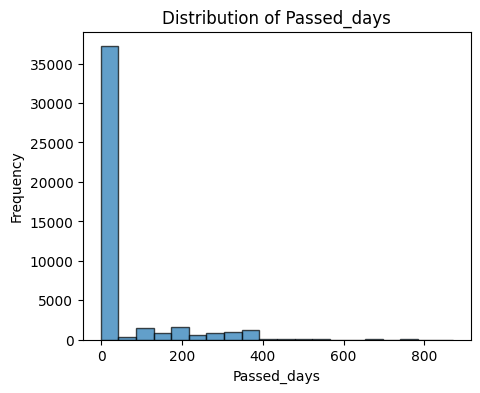

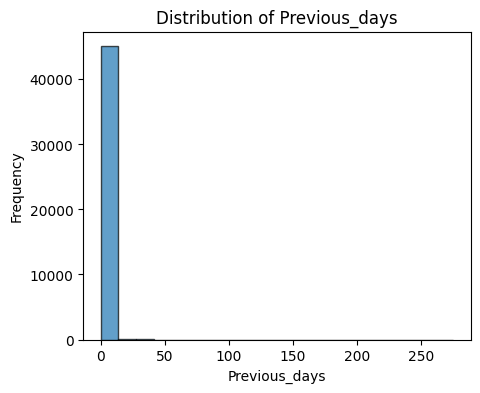

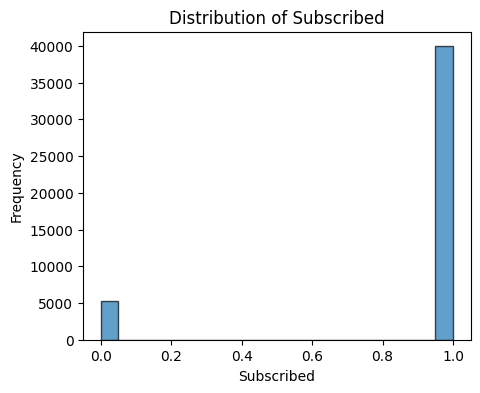

In [20]:
# Plot histogram to see the distribution of data

for feature in numeric_features:
    plt.figure(figsize=(5, 4))
    plt.hist(df[feature], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [21]:
df.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [22]:
# check correlation

df[numeric_features].corr()

,Age,Balance,Last_contact_day,Contact_duration,Campaign,Passed_days,Previous_days,Subscribed
Age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.025155
Balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.052838
Last_contact_day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.028348
Contact_duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.394521
Campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.073172
Passed_days,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.103621
Previous_days,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.093236
Subscribed,-0.025155,-0.052838,0.028348,-0.394521,0.073172,-0.103621,-0.093236,1.000000


<Axes: >

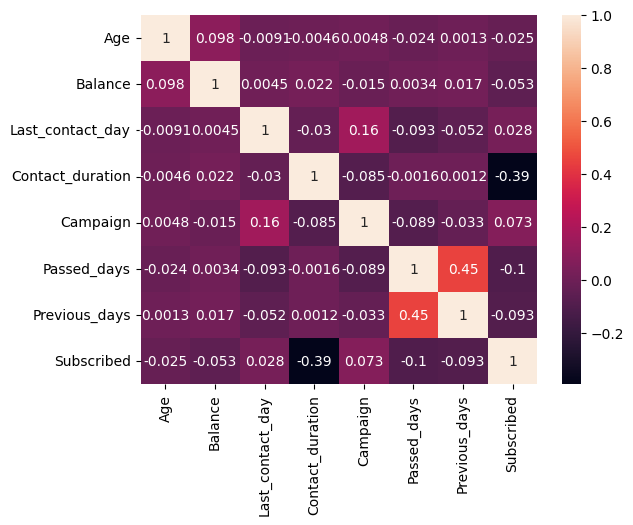

In [23]:
sns.heatmap(df[numeric_features].corr(),annot=True)

#### Conclusion

1. Contact_duration has a notable negative correlation with Subscribed (-0.394), suggesting that shorter contact durations might be associated with a higher likelihood of subscription. This relationship may imply that longer calls do not necessarily lead to successful conversions.
2. Passed_days and Previous_days both have weak negative correlations with Subscribed (-0.103 and -0.093, respectively). This could imply that as the days since the last campaign or previous contact increase, the likelihood of subscription slightly decreases, potentially highlighting the importance of timely follow-ups.
3. Age, Last_contact_day, and Campaign all exhibit very weak correlations with Subscribed, indicating that these variables do not have a strong linear relationship with the likelihood of subscription. Therefore, these factors may not be key predictors in determining subscription outcomes.
4. The moderate positive correlation between Passed_days and Previous_days (0.454) remains notable, as it suggests that these two variables might capture related aspects of client engagement history. 

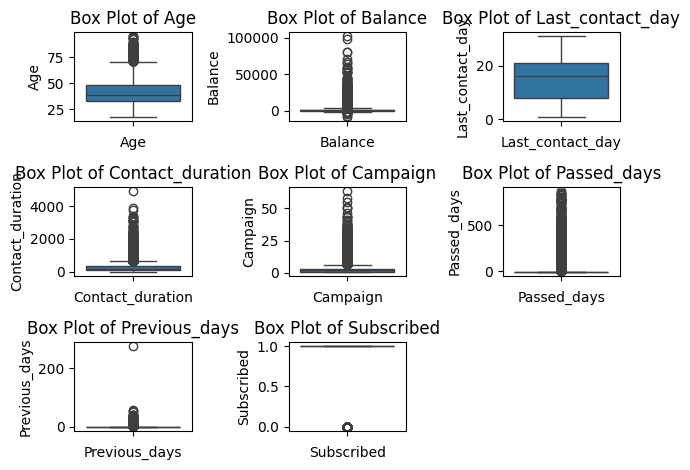

In [24]:
# Box plot

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [25]:
df.head()

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


### Handling Categorical features

In [26]:
# Store features with 2 or less unique values in a list

two_category =[]
for i in df.columns:
    if df[i].nunique() <= 2:
        two_category.append(i)
print(two_category)

['Default', 'House_loan', 'Pers_loan', 'Subscribed']


In [27]:
# remove subscribed

two_category.remove('Subscribed')

In [28]:
two_category

['Default', 'House_loan', 'Pers_loan']

In [29]:
# function to change str values to 0 or 1 and then converting the dtype

def category_to_numeric(variable):
    df[variable] = df[variable].replace({'no':0,'yes':1})
    df[variable] = df[variable].astype(int)

In [30]:
# for loop to iterate through every feature and then calling function

for feature in two_category:
    category_to_numeric(feature)

df.head()

C:\Users\a\AppData\Local\Temp\ipykernel_12788\1770521339.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[variable] = df[variable].replace({'no':0,'yes':1})
C:\Users\a\AppData\Local\Temp\ipykernel_12788\1770521339.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[variable] = df[variable].replace({'no':0,'yes':1})
C:\Users\a\AppData\Local\Temp\ipykernel_12788\1770521339.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

,Age,Job,Marital_status,Education,Default,Balance,House_loan,Pers_loan,Contact,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,Previous_days,Prev_out_come,Subscribed
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,0,29.0,1,0,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


#### One Hot Encoding (Nominal Encoding)

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
# Initialize the OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' removes the first category to avoid multicollinearity

In [33]:
# Handling 'Job' column

encoded_data = encoder.fit_transform(df[['Job']])

# Convert the encoded data to a DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Job']))

# Concatenate the encoded DataFrame with the original DataFrame (excluding 'Job' column)
df = pd.concat([df.drop('Job', axis=1), encoded_data_df], axis=1)

In [34]:
# Handling Marital_status column

# Fit and transform the 'Marital_status' column
encoded_data = encoder.fit_transform(df[['Marital_status']])

# Convert the encoded data to a DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Marital_status']))

# Concatenate the encoded DataFrame with the original DataFrame (excluding 'Job' column)
df = pd.concat([df.drop('Marital_status', axis=1), encoded_data_df], axis=1)

In [35]:
# Handling 'Education' column

# Fit and transform the 'Education' column
encoded_data = encoder.fit_transform(df[['Education']])

# Convert the encoded data to a DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Education']))

# Concatenate the encoded DataFrame with the original DataFrame (excluding 'Job' column)
df = pd.concat([df.drop('Education', axis=1), encoded_data_df], axis=1)

In [36]:
# Handling 'Contact' column

# Fit and transform the 'Contact' column
encoded_data = encoder.fit_transform(df[['Contact']])

# Convert the encoded data to a DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Contact']))

# Concatenate the encoded DataFrame with the original DataFrame (excluding 'Job' column)
df = pd.concat([df.drop('Contact', axis=1), encoded_data_df], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     45211 non-null  uint8   
 1   Default                 45211 non-null  int64   
 2   Balance                 45211 non-null  float64 
 3   House_loan              45211 non-null  int64   
 4   Pers_loan               45211 non-null  int64   
 5   Last_contact_day        45211 non-null  uint8   
 6   Last_contact_month      45211 non-null  category
 7   Contact_duration        45211 non-null  float64 
 8   Campaign                45211 non-null  uint8   
 9   Passed_days             45211 non-null  float64 
 10  Previous_days           45211 non-null  float64 
 11  Prev_out_come           45211 non-null  category
 12  Subscribed              45211 non-null  int64   
 13  Job_blue-collar         45211 non-null  float64 
 14  Job_entrepreneur      

In [38]:
print(df['Prev_out_come'].unique())
print(df['Last_contact_month'].unique())

['unknown', 'failure', 'other', 'success']
Categories (4, object): ['failure' < 'other' < 'success' < 'unknown']
['may', 'jun', 'jul', 'aug', 'oct', ..., 'jan', 'feb', 'mar', 'apr', 'sep']
Length: 12
Categories (12, object): ['apr' < 'aug' < 'dec' < 'feb' ... 'may' < 'nov' < 'oct' < 'sep']


In [39]:
# Handling 'Prev_out_come' column

# Fit and transform the 'Prev_out_come' column
encoded_data = encoder.fit_transform(df[['Prev_out_come']])

# Convert the encoded data to a DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Prev_out_come']))

# Concatenate the encoded DataFrame with the original DataFrame (excluding 'Job' column)
df = pd.concat([df.drop('Prev_out_come', axis=1), encoded_data_df], axis=1)

#### Ordinal Encoding

In [40]:
# Handling 'Last_contact_month' column

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['Last_contact_month'] = df['Last_contact_month'].map(month_mapping)

In [41]:
df['Last_contact_month'] = df['Last_contact_month'].astype(int)

In [155]:
df.head()

,Age,Default,Balance,House_loan,Pers_loan,Last_contact_day,Last_contact_month,Contact_duration,Campaign,Passed_days,...,Marital_status_married,Marital_status_single,Education_secondary,Education_tertiary,Education_unknown,Contact_telephone,Contact_unknown,Prev_out_come_other,Prev_out_come_success,Prev_out_come_unknown
0,58,0,2143.0,1,0,5,5,261.0,1,-1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,44,0,29.0,1,0,5,5,151.0,1,-1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33,0,2.0,1,1,5,5,76.0,1,-1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,47,0,1506.0,1,0,5,5,92.0,1,-1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,33,0,1.0,0,0,5,5,198.0,1,-1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45211 non-null  uint8  
 1   Default                 45211 non-null  int64  
 2   Balance                 45211 non-null  float64
 3   House_loan              45211 non-null  int64  
 4   Pers_loan               45211 non-null  int64  
 5   Last_contact_day        45211 non-null  uint8  
 6   Last_contact_month      45211 non-null  int64  
 7   Contact_duration        45211 non-null  float64
 8   Campaign                45211 non-null  uint8  
 9   Passed_days             45211 non-null  float64
 10  Previous_days           45211 non-null  float64
 11  Subscribed              45211 non-null  int64  
 12  Job_blue-collar         45211 non-null  float64
 13  Job_entrepreneur        45211 non-null  float64
 14  Job_housemaid           45211 non-null

In [129]:
print(df.shape)
print(df['Subscribed'].value_counts())

(45211, 33)
Subscribed
1    39922
0     5289
Name: count, dtype: int64


#### Independent and Dependent feature
#### Train Test Split

In [47]:
X = df.drop(columns=['Subscribed'])
y = df['Subscribed']

print(X.shape)
print(y.shape)

(45211, 32)
(45211,)


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 32)
(11303, 32)
(33908,)
(11303,)


### Handling Imbalanced Data

#### SMOTETomek technique

In [132]:
from imblearn.combine import SMOTETomek

In [133]:
# Helps us to count the values respectively

from collections import Counter

In [136]:
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 29924, 0: 3984})


In [139]:
# Initialize smote

smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("Class distribution after SMOTE-Tomek:", Counter(y_resampled))

The number of classes before fit Counter({1: 29924, 0: 3984})
Class distribution after SMOTE-Tomek: Counter({1: 29198, 0: 29198})


### Train the model

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [140]:
models={  
    "XgBoost":XGBClassifier(),  
    "Decision Tree":DecisionTreeClassifier(),  
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier()
}  

for i in range(len(list(models))):  
    model = list(models.values())[i]  
    model.fit(X_train_resampled, y_train_resampled) # Train model  

    # Make predictions  
    y_train_pred = model.predict(X_train_resampled)  
    y_test_pred = model.predict(X_test)
    
    # Training set performance  
    model_train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    classification_tain_score = classification_report(y_train_resampled,y_train_pred)
    confusion_train_score = confusion_matrix(y_train_resampled,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train_resampled, y_train_pred)  

    # Test set performance  
    model_test_accuracy = accuracy_score(y_test, y_test_pred)    
    classification_test_score = classification_report(y_test,y_test_pred)
    confusion_test_score = confusion_matrix(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])  
    
    print('Model performance for Training set')  
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))   
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('- Confusion matrix ',confusion_train_score)
    print('- Classification report ',classification_tain_score)
    

    print('--------------------------------------------------------------------------')  
    
    
    print('Model performance for Test set')  
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))    
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))  
    print('- Confusion matrix ',confusion_test_score)
    print('- Classification report ',classification_test_score)
    print('='*85)  
    print('\n')

XgBoost
Model performance for Training set
- Accuracy: 0.9715
- Roc Auc Score: 0.9715
- Confusion matrix  [[28141  1057]
 [  610 28588]]
- Classification report                precision    recall  f1-score   support

           0       0.98      0.96      0.97     29198
           1       0.96      0.98      0.97     29198

    accuracy                           0.97     58396
   macro avg       0.97      0.97      0.97     58396
weighted avg       0.97      0.97      0.97     58396

--------------------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.9049
- Roc Auc Score: 0.7560
- Confusion matrix  [[ 734  571]
 [ 504 9494]]
- Classification report                precision    recall  f1-score   support

           0       0.59      0.56      0.58      1305
           1       0.94      0.95      0.95      9998

    accuracy                           0.90     11303
   macro avg       0.77      0.76      0.76     11303
weighted avg      

C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Model performance for Training set
- Accuracy: 0.9261
- Roc Auc Score: 0.9261
- Confusion matrix  [[26679  2519]
 [ 1794 27404]]
- Classification report                precision    recall  f1-score   support

           0       0.94      0.91      0.93     29198
           1       0.92      0.94      0.93     29198

    accuracy                           0.93     58396
   macro avg       0.93      0.93      0.93     58396
weighted avg       0.93      0.93      0.93     58396

--------------------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.8890
- Roc Auc Score: 0.7307
- Confusion matrix  [[ 685  620]
 [ 635 9363]]
- Classification report                precision    recall  f1-score   support

           0       0.52      0.52      0.52      1305
           1       0.94      0.94      0.94      9998

    accuracy                           0.89     11303
   macro avg       0.73      0.73      0.73     11303
weighted avg     

### Conclusion

1. XGBoost: Delivered the best balance between train and test performance, with a 90.49% accuracy and 0.756 ROC AUC on the test set, effectively handling the majority class but with lower precision and recall for the minority class.

2. Decision Tree: Achieved perfect accuracy (100%) on the training set, indicating overfitting, with test accuracy dropping to 86.64% and a lower ROC AUC of 0.709, struggling particularly with the minority class.

3. Random Forest: Similarly overfitted in training (100% accuracy) and achieved a test accuracy of 90.2% with a 0.713 ROC AUC, showing limited improvement in handling the minority class.

4. AdaBoost: Showed moderate performance, with 88.9% test accuracy and an ROC AUC of 0.731, performing well on the majority class but with reduced recall on the minority class, suggesting some limitations with imbalanced data.

In [61]:
# Hyperparameter Tuning
# Randomized and GridSearch CVs

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [104]:
# Using XgBoost

# logloss is commonly used for binary classification tasks.
# use_label_encoder=False disables XGBoost's label encoding and prevents a deprecation warning.
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

In [142]:
param_grid = {
    'n_estimators': [150, 200, 250],          # Number of boosting rounds
    'learning_rate': [ 0.01, 0.05, 0.2, 0.3],       # Step size shrinkage
    'max_depth': [ 10, 15,20,25,30],                      # Maximum depth of a tree
    'subsample': [1.0,1.5,2.0],                        # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8,0.9, 1.0],                 # Fraction of features used per tree
    'gamma': [0.5, 0.1, 0.2, 0.3, 0.4],                    # Minimum loss reduction for partitioning
    'reg_alpha': [0, 0.5, 0.1, 1],                  # L1 regularization term on weights
    'reg_lambda': [1, 0.1, 0.5, 10]                # L2 regularization term on weights
}


In [143]:
rcv = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                   n_iter=30, scoring='roc_auc', cv=5, verbose=3,
                                   random_state=42, n_jobs=-1)

In [144]:
# Fit the RandomizedSearchCV
rcv.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = rcv.best_params_
best_score = rcv.best_score_
print("Best Parameters:", best_params)
print("Best ROC AUC Score during tuning:", best_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
115 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\xgboost\sklearn.py", line 1531, in fit
    self._Booster = train(
 

Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 250, 'max_depth': 30, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best ROC AUC Score during tuning: 0.9900938744193869


In [153]:
rcv_xg_model = rcv.best_estimator_

In [145]:
# Make predictions on the test set
y_pred = rcv.best_estimator_.predict(X_test)
y_pred_proba = rcv.best_estimator_.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Test ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9035654251083783
Test ROC AUC Score: 0.9276205815875819
Confusion Matrix:
 [[ 689  616]
 [ 474 9524]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56      1305
           1       0.94      0.95      0.95      9998

    accuracy                           0.90     11303
   macro avg       0.77      0.74      0.75     11303
weighted avg       0.90      0.90      0.90     11303



### Conclusion (RandomizedSearchCV XgBoost)

The model achieves a test accuracy of 90.26% and a ROC AUC score of 0.93, indicating good performance. The precision and recall for class 1 (the positive class) are high, with precision at 0.94 and recall at 0.95. However, the model struggles with class 0 (the negative class), as indicated by lower precision (0.59) and recall (0.51). Overall, the model performs well for predicting the positive class, but further improvement is needed for the negative class.

In [147]:
# GridSearchCV
# param grid

param_grid = {
    'n_estimators': [150,200,250],          # Number of boosting rounds
    'learning_rate': [0.03, 0.05],       # Step size shrinkage
    'max_depth': [20,30,50],                      # Maximum depth of a tree
    'subsample': [0.8,1.0,1.2],                        # Fraction of samples used per tree
    'colsample_bytree': [0.8],                 # Fraction of features used per tree
    'gamma': [ 0.5,0.3],                    # Minimum loss reduction for partitioning
    'reg_alpha': [0,0.1],                  # L1 regularization term on weights
    'reg_lambda': [0.1]                # L2 regularization term on weights
}

#Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 250, 
         #         'max_depth': 30, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}

In [148]:
gcv = GridSearchCV(xgb,param_grid=param_grid,verbose=3,n_jobs=-1,cv=3)

In [149]:
# Fit GridSearchCV

gcv.fit(X_train_resampled,y_train_resampled)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\xgboost\sklearn.py", line 1531, in fit
    self._Booster = train(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.5, 0.3],
                         'learning_rate': [0.03, 0.05],
                         'max_depth': [20, 30, 50],
                         'n_estimators': [150, 200, 250], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0.1], 'subsample': [0.8, 1.0, 1.2]},
             verbose=3)

In [150]:
# Get the best parameters and best score
best_params = gcv.best_params_
best_score = gcv.best_score_
print("Best Parameters:", best_params)
print("Best ROC AUC Score during tuning:", best_score)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.03, 'max_depth': 50, 'n_estimators': 150, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.8}
Best ROC AUC Score during tuning: 0.9215886561816126


In [151]:
# Make predictions on the test set
y_pred = gcv.best_estimator_.predict(X_test)
y_pred_proba = gcv.best_estimator_.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Test ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9028576484119261
Test ROC AUC Score: 0.9271724843052902
Confusion Matrix:
 [[ 662  643]
 [ 455 9543]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55      1305
           1       0.94      0.95      0.95      9998

    accuracy                           0.90     11303
   macro avg       0.76      0.73      0.75     11303
weighted avg       0.90      0.90      0.90     11303



### Conclusion (GridSearchCV XgBoost)

The model achieved 90.3% accuracy and a ROC AUC score of 0.93 on the test set, indicating strong performance in distinguishing between classes. However, the recall for Class 0 is relatively low (49%), suggesting room for improvement in capturing the minority class.

In [118]:
# Random Forest

rf = RandomForestClassifier(random_state=42,class_weight='balanced')

In [119]:
param_grid = {
    'n_estimators': [250, 300, 350],  # Around the optimal 300
    'max_depth': [12, 15, 18],        # Around the optimal 15
    'min_samples_split': [2, 5, 10],  # Common values to explore for splitting
    'min_samples_leaf': [1, 2, 4],    # Common leaf sizes
    'max_features': ['auto', 'sqrt'], # Typical values to try in Random Forests
    'bootstrap': [True, False]        # Exploring both bootstrap options
}

In [120]:
gcv = GridSearchCV(rf,param_grid=param_grid,verbose=3,n_jobs=-1,cv=3)

In [121]:
# Fit GridSearchCV

gcv.fit(X_train_resampled,y_train_resampled)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
181 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\a\anaconda3\envs\bankmarket\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [12, 15, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [122]:
# Get the best parameters and best score
best_params = gcv.best_params_
best_score = gcv.best_score_
print("Best Parameters:", best_params)
print("Best ROC AUC Score during tuning:", best_score)

Best Parameters: {'bootstrap': True, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}
Best ROC AUC Score during tuning: 0.9206810495068928


In [123]:
# Make predictions on the test set
y_pred = gcv.best_estimator_.predict(X_test)
y_pred_proba = gcv.best_estimator_.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Test ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9040962576307175
Test ROC AUC Score: 0.9221939407038496
Confusion Matrix:
 [[ 652  653]
 [ 431 9567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55      1305
           1       0.94      0.96      0.95      9998

    accuracy                           0.90     11303
   macro avg       0.77      0.73      0.75     11303
weighted avg       0.90      0.90      0.90     11303



### Conclusion (GridSearchCV Random Forest)

1. Overall Accuracy: The model achieved an accuracy of 90.4%.
2. Class Imbalance: The model performs well on the majority class (1) with high precision (0.94) and recall (0.96), but struggles with the minority class (0), showing only 0.50 recall.
3. ROC AUC: The model has a strong ROC AUC score of 0.92, indicating good overall discrimination.
4. Performance on Minority Class: Improvements are needed for the minority class (0) performance, as recall and precision are relatively low, likely due to class imbalance.

### Using RandomizedSearchCV XgBoost because it gave the best accuracy

In [154]:
import pickle

# Dump the file
with open('XgBoost_classifier_model.pkl', 'wb') as file:
    pickle.dump(rcv_xg_model, file)
print("Model saved to best_xgb_model.pkl")

Model saved to best_xgb_model.pkl
